In [1]:
from dpll import dpll
from compiler import compile_model
import matplotlib.pyplot as plt
from visualization import Visualization
from sops import indices, ones, OneHotTokEmb

test_id = 3
sample_inputs = [
    "[BOS] 1 -2 3 0 -1 2 -3 0 2 4 -1 0 1 -3 4 0 -2 -3 -4 0 3 -4 -1 0 -2 4 -1 0 [SEP] D 1 [UP] D 1 D 2 [UP] D 1 D 2 4 -3 [BT] D 1 -2 -3 4 [BT] -1 D 2 [UP] -1 D 2 3 4 [BT] -1 -2 D 3 [UP] -1 -2 D 3 4 SAT",
    "[BOS] 6 -7 -5 0 -4 -8 9 0 -1 -8 2 0 -3 6 1 0 5 -9 -10 0 -7 -1 9 0 -4 -6 10 0 -4 -8 7 0 -7 -2 -8 0 3 6 1 0 8 1 3 0 6 3 7 0 3 9 7 0 3 -9 -5 0 -1 3 2 0 5 3 -6 0 -10 7 4 0 8 -9 -10 0 1 -4 5 0 -2 10 7 0 -10 5 -2 0 -8 10 -7 0 -4 -5 -1 0 -10 -7 6 0 10 7 -1 0 -3 -6 7 0 4 6 -9 0 -9 -10 7 0 -7 -10 8 0 5 4 -2 0 -1 -3 4 0 -3 -8 1 0 7 9 10 0 4 3 2 0 10 2 3 0 9 -4 8 0 9 5 2 0 1 -2 -8 0 8 9 -1 0 1 -10 4 0 5 2 -1 0 [SEP] D 7 [UP] D 7 D 1 [UP] D 7 D 1 9 D 6 [UP] D 7 D 1 9 D 6 D 5 [UP] D 7 D 1 9 D 6 D 5 3 -4 [BT] D 7 D 1 9 D 6 -5 -10 -4 3 [BT] D 7 D 1 9 -6 -5 -10 -8 4 2 SAT",
    "[BOS] 6 -8 10 0 2 -6 -7 0 8 -7 3 0 -3 1 -2 0 -2 -10 4 0 1 -6 -2 0 -8 4 -9 0 1 10 -5 0 8 4 5 0 -7 -6 -4 0 6 3 10 0 1 7 -10 0 1 6 -3 0 7 10 -9 0 -2 1 4 0 -7 -9 4 0 9 6 -3 0 4 -2 -9 0 3 8 -1 0 -1 5 -3 0 -2 -3 -7 0 4 -2 8 0 -6 -9 -10 0 4 5 10 0 -7 3 -2 0 -6 7 4 0 -8 -1 -10 0 -7 8 10 0 -9 -7 -1 0 -6 -2 5 0 -6 5 -3 0 -6 -4 9 0 9 -10 7 0 8 -3 -7 0 7 -10 -5 0 1 2 -4 0 4 -8 3 0 8 -3 6 0 -8 -2 1 0 6 -3 -10 0 -1 -6 -2 0 6 -4 2 0 10 3 6 0 [SEP] D 8 [UP] D 8 D -4 [UP] D 8 D -4 -9 3 6 7 2 [BT] D 8 4 D -6 [UP] D 8 4 D -6 10 -1 7 -3 -2 [BT] D 8 4 6 -7 9 10 [BT] -8 D 2 [UP] -8 D 2 4 D -7 [UP] -8 D 2 4 D -7 D -5 [UP] -8 D 2 4 D -7 D -5 -6 -3 10 1 [BT] -8 D 2 4 D -7 5 -10 1 -9 3 6 [BT] -8 D 2 4 7 3 [BT] -8 -2 D 3 [UP] -8 -2 D 3 -7 6 4 5 9 10 [BT] -8 -2 -3 -7 -1 -10 -5 4 UNSAT",
    "[BOS] 1 9 -5 0 3 6 -8 0 1 -7 4 0 5 -9 -1 0 -3 -7 -1 0 -6 -2 -3 0 6 2 3 0 -7 -6 5 0 -6 -9 7 0 3 5 -8 0 9 4 -6 0 -1 -4 -8 0 2 1 7 0 9 4 7 0 5 7 8 0 5 -1 -7 0 7 2 3 0 5 2 -7 0 3 -5 4 0 8 -7 -4 0 9 3 1 0 8 -5 7 0 3 9 -6 0 4 9 2 0 4 1 -2 0 -3 9 -4 0 -9 -6 -8 0 3 8 2 0 5 -7 4 0 -5 3 -8 0 -8 1 -4 0 -7 2 4 0 9 -6 1 0 9 -1 5 0 8 -1 -9 0 9 4 5 0 7 1 -5 0 -6 -1 -2 0 -1 -9 3 0 [SEP] D 1 [UP] D 1 D 2 [UP] D 1 D 2 -6 D 3 [UP] D 1 D 2 -6 D 3 -7 D 4 [UP] D 1 D 2 -6 D 3 -7 D 4 9 5 8 [BT] D 1 D 2 -6 D 3 -7 -4 9 5 8 SAT",
]
# sample_input_unsat = "[BOS] 1 -2 3 0 -1 2 -3 0 2 4 -1 0 1 -3 4 0 -2 -3 -4 0 3 -4 -1 0 -2 4 -1 0 1 2 -3 0 1 2 3 0 [SEP]"
sample_input = sample_inputs[test_id]
prompt_str = sample_input.split("[SEP]")[0] + "[SEP]"
trace_str = sample_input.split("[SEP]")[1].strip()
prompt_tokens = prompt_str.split()
trace_tokens = trace_str.split()
full_trace_tokens = prompt_tokens + trace_tokens

context_len = len(full_trace_tokens) + 500
num_vars = max(int(tok) for tok in full_trace_tokens if tok.isdigit())
num_clauses = prompt_str.count("0") + 2
sop, vocab, sop_logs = dpll(num_vars=num_vars, num_clauses=num_clauses, context_len=context_len, return_logs=True, mean_exactness=50, nonsep_penalty=50)


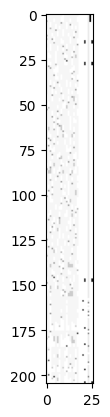

In [2]:
abstract_out = sop.abstract_eval(full_trace_tokens)
plt.imshow(abstract_out, cmap='Greys')
plt.show()

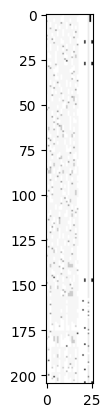

In [3]:
concrete_out = sop.concrete_eval(full_trace_tokens)
plt.imshow(concrete_out, cmap='Greys')
plt.show()

In [4]:
import numpy as np
# debugging
for name, log_sop in sop_logs.items():
    abstract_val = log_sop.abstract_eval(full_trace_tokens).squeeze()
    concrete_val = log_sop.concrete_eval(full_trace_tokens).squeeze()
    errors = np.abs(abstract_val - concrete_val)
    threshold = 0.01
    max_error = errors.max()
    if max_error > threshold:
        print(f"Large Error SOp {name}: {max_error}")

Large Error SOp p_i_sep_2: 0.15888512132005417
Large Error SOp o_up: 0.01351414498718384


Model Hidden Size 104


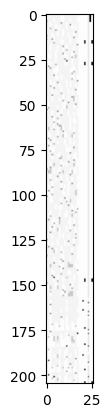

In [5]:
dpll_model = compile_model(sop, vocab, context_len)
print("Model Hidden Size", dpll_model.hidden_size)
out = dpll_model.apply_tokens(full_trace_tokens)
model_out = out.detach().numpy()[0]
plt.imshow(model_out, cmap='Greys')

In [6]:
diff = (abstract_out - model_out)[1:]


abs_pred_ids = abstract_out.argmax(axis=1).squeeze()
model_pred_ids = model_out.argmax(axis=1).squeeze()

abs_pred_tokens = np.array(vocab)[abs_pred_ids]
model_pred_tokens = np.array(vocab)[model_pred_ids]

print(abs_pred_tokens)
print(model_pred_tokens)

['SAT' 'SAT' 'SAT' 'SAT' 'SAT' '9' '-5' 'D' '3' '6' '-8' 'D' '1' '-7' '4'
 'UNSAT' 'UNSAT' '-9' '-1' 'D' '-3' '-7' '-1' '-8' '-6' '-2' '-3' 'UNSAT'
 'UNSAT' '2' '3' 'D' '-7' '-6' '5' 'D' '-6' '-9' '7' 'D' '3' '5' '-8' 'D'
 '9' '4' '-6' '-7' '-1' '-4' '-8' '-3' '2' '1' '7' 'D' '9' '4' '7' 'D' '5'
 '7' '8' '2' '5' '-1' '-7' '-1' '7' '2' '3' 'D' '5' '2' '-7' 'D' '3' '-5'
 '4' '9' '8' '-7' '-4' '5' '9' '3' '1' '2' '8' '-5' '7' 'D' '3' '9' '-6'
 'D' '4' '9' '2' '-8' '4' '1' '-2' '-5' '-3' '9' '-4' 'D' '-9' '-6' '-8'
 '-6' '3' '8' '2' '8' '5' '-7' '4' '7' '-5' '3' '-8' 'D' '-8' '1' '-4' 'D'
 '-7' '2' '4' '5' '9' '-6' '1' 'D' '9' '-1' '5' '3' '8' '-1' '-9' 'D' '9'
 '4' '5' 'UNSAT' 'UNSAT' '1' '-5' '3' '-6' '-1' '-2' '-4' '-1' 'D' '1'
 '[UP]' 'D' '3' 'D' '1' '[UP]' 'D' '3' 'D' '9' 'D' 'D' 'D' '4' '8' '[BT]'
 'D' '3' '-9' '-4' '2' '1' '5' '7' '[BT]' '-3' 'D' '2' 'D' '1' '[UP]' '-3'
 '-8' '2' 'D' '-5' '7' '4' '[BT]' '-3' '-8' '2' '5' '4' '7' 'UNSAT']
['SAT' 'SAT' 'SAT' 'SAT' 'SAT' '9' '-5' 'D' '

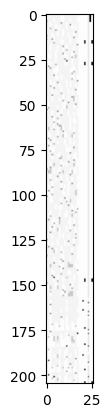

In [7]:
plt.imshow(out.detach().numpy()[0], cmap='Greys')
plt.show()

In [8]:
print(dpll_model.generate(prompt_tokens))

['[BOS]', '1', '9', '-5', '0', '3', '6', '-8', '0', '1', '-7', '4', '0', '5', '-9', '-1', '0', '-3', '-7', '-1', '0', '-6', '-2', '-3', '0', '6', '2', '3', '0', '-7', '-6', '5', '0', '-6', '-9', '7', '0', '3', '5', '-8', '0', '9', '4', '-6', '0', '-1', '-4', '-8', '0', '2', '1', '7', '0', '9', '4', '7', '0', '5', '7', '8', '0', '5', '-1', '-7', '0', '7', '2', '3', '0', '5', '2', '-7', '0', '3', '-5', '4', '0', '8', '-7', '-4', '0', '9', '3', '1', '0', '8', '-5', '7', '0', '3', '9', '-6', '0', '4', '9', '2', '0', '4', '1', '-2', '0', '-3', '9', '-4', '0', '-9', '-6', '-8', '0', '3', '8', '2', '0', '5', '-7', '4', '0', '-5', '3', '-8', '0', '-8', '1', '-4', '0', '-7', '2', '4', '0', '9', '-6', '1', '0', '9', '-1', '5', '0', '8', '-1', '-9', '0', '9', '4', '5', '0', '7', '1', '-5', '0', '-6', '-1', '-2', '0', '-1', '-9', '3', '0', '[SEP]', 'D', '1', '[UP]', 'D', '1', 'D', '2', '[UP]', 'D', '1', 'D', '2', '-6', 'D', '3', '[UP]', 'D', '1', 'D', '2', '-6', 'D', '3', '-7', 'D', '4', '[UP]', '

In [9]:
# print(dpll_model.generate(unsat_tokens))

In [10]:
# Find the max parameter value of model
print(dpll_model)
print("Max Param:", dpll_model.find_max_parameter())

TransformerModel(
  (embed_tokens): Embedding(26, 247)
  (layers): ModuleList(
    (0-5): 6 x TransformerBlock(
      (attn): MultiHeadSelfAttention(
        (q_proj): Linear(in_features=247, out_features=104, bias=False)
        (k_proj): Linear(in_features=247, out_features=104, bias=False)
        (v_proj): Linear(in_features=247, out_features=104, bias=False)
        (out_proj): Linear(in_features=104, out_features=247, bias=False)
      )
      (mlp): MLPLayer(
        (linear1): Linear(in_features=247, out_features=116, bias=True)
        (glu): GLU()
        (linear2): Linear(in_features=58, out_features=247, bias=True)
      )
    )
  )
  (lm_head): Linear(in_features=247, out_features=26, bias=False)
)
Max Param: (822.3099975585938, 'layers.3.attn.q_proj.weight')


In [11]:
dpll_model.summary()

Transformer Model Summary
Vocabulary Size: 26
Embedding Dimension: 247
Number of Layers: 6
Number of Heads: 4
Head Dimension: 61
MLP Dimension: 58
Hidden Size: 104
Maximum Sequence Length: 705
Output Size: 26
Use Layer Normalization: No
Total Parameters: 1063537
Trainable Parameters: 1063537

Transformer Block Details:
  Layer 1: 146093 parameters
  Layer 2: 146093 parameters
  Layer 3: 146093 parameters
  Layer 4: 146093 parameters
  Layer 5: 146093 parameters
  Layer 6: 146093 parameters

Other Parameters:
  LM Head: 6422 parameters
